<a href="https://colab.research.google.com/github/gonzalezzayra/EDP-I/blob/main/sturm_liouville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problemas de Sturm-Liouville con Sympy**

Resolver los dos problemas de Sturm-Liouville

$$X'' + kX = 0, \text{ } X(0)=X(1)=0$$

$$X'' + kX = 0, \text{ } X'(0)=X'(1)=0$$



In [102]:
#Importar librerias
from sympy import *
import sympy as sp
import scipy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [104]:
#Utilizaremos X, k y t porque X(t), definimos
t = sp.symbols('t')
k = sp.symbols('k', positive=True)  #Definimos lambda positiva
#si el problema hubiera sido X" -kX =0, lambda la hubieramos definido negativa
X = sp.Function('X')

**Problema 1**

In [105]:
ode1 = sp.Eq(sp.Derivative(X(t), t, t) + k * X(t), 0)
sol1 = sp.dsolve(ode1, X(t))  # Solución general
sol1
C1, C2 = sp.symbols('C1, C2')

#print(ode1)
sol1

Eq(X(t), C1*sin(sqrt(k)*t) + C2*cos(sqrt(k)*t))

In [106]:
#Condiciones de frontera del problema 1
#X(0)=0, X(1)=0
cond1 = sol1.rhs.subs(t, 0)
cond2 = sol1.rhs.subs(t, 1)

In [107]:
const = sp.solve([cond1, cond2], [C1, C2])
const

{C1: 0, C2: 0}

In [108]:
#Resolvemos para sen((k)**1/2 t )
# k^(1/2)=n*pi entonces k = n^2 pi^2
#Es como si tuvieramos X= sen(n^2 p^2)
valor_n = [1, 3, 5]

valor_k=[]
for n in valor_n:
    valor_k.append(((n)*(pi))**2)
print("Los valores de k=", valor_k)


Los valores de k= [pi**2, 9*pi**2, 25*pi**2]


In [109]:
#X(t)=sin(n*pi*t), evaluamos en los valores de n, que son 1,3 y 5
sens1=[]
for n in valor_n:
    sens1.append(sin(n * pi * t))
print(sens1)

[sin(pi*t), sin(3*pi*t), sin(5*pi*t)]


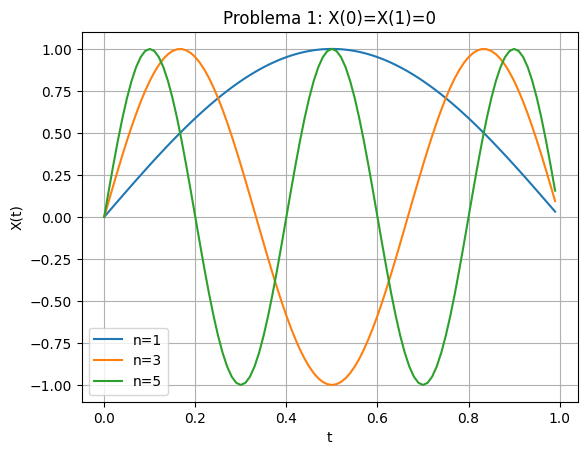

In [110]:
#Para la grafica
tt = np.arange(0, 1, 0.01)
plt.figure()
for i, func in enumerate(sens1):
    func1 = sp.lambdify(t, func, 'numpy')
    yy1 = func1(tt)
    plt.plot(tt, yy1, label=f'n={2*i+1}')
plt.xlabel('t')
plt.ylabel('X(t)')
plt.title("Problema 1: X(0)=X(1)=0")
plt.grid()
plt.legend()
plt.show()

**Problema 2**

In [111]:
#Para el segundo problema definimos
ode2 = sp.Eq(sp.Derivative(X(t), t, t) + k * X(t), 0)
sol2 = sp.dsolve(ode2, X(t))
C1, C2 = sp.symbols('C1, C2')

sol2

Eq(X(t), C1*sin(sqrt(k)*t) + C2*cos(sqrt(k)*t))

In [112]:
#Condiciones de frontera para el problema 2
#X'(0)=0, #X'(1)=0
cond1 = sol2.rhs.diff(t, 1).subs(t, 0)
cond2 = sol2.rhs.diff(t, 1).subs(t, 1)

In [113]:
#Resolvemos para cada condición
const = sp.solve([cond1, cond2], [C1, C2])

In [116]:
#Resolvemos para cos((k)**1/2 )
# k^(1/2)=n*pi entonces k = n^2 pi^2
#Es como si tuvieramos X= cos(n^2 p^2)
valor2_n = [1, 3, 5]
#valor2_n = [0, 1, 2]
#evaluar k con los valores de n
valor2_k=[]
for n in valor2_n:
    valor2_k.append(((n)*(pi))**2)
print("Los valores de k=", valor2_k)

Los valores de k= [pi**2, 9*pi**2, 25*pi**2]


In [119]:
#X(t)=cos(n*pi*t), evaluamos en los valores de n, que son 1,3 y 5
cos1=[]
for n in valor2_n:
    cos1.append(cos(n * pi * t))
print(cos1)

[cos(pi*t), cos(3*pi*t), cos(5*pi*t)]


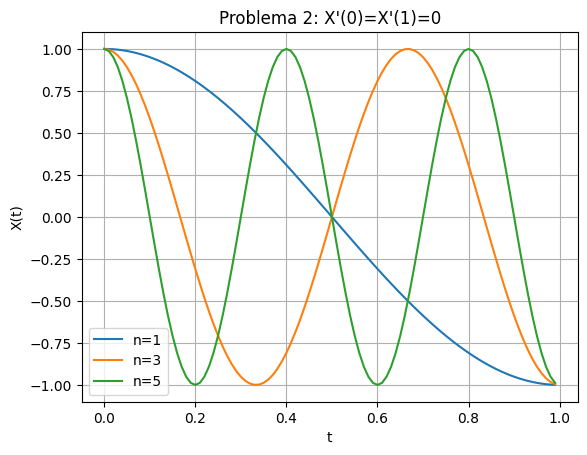

In [120]:
#Grafica
tt = np.arange(0, 1, 0.01)
plt.figure()
for i, func in enumerate(cos1):
    func1 = sp.lambdify(t, func, 'numpy')
    yy1 = func1(tt)
    plt.plot(tt, yy1, label=f'n={2*i+1}')
plt.xlabel('t')
plt.ylabel("X(t)")
plt.title("Problema 2: X\'(0)=X\'(1)=0")
plt.grid()
plt.legend()
plt.show()